In [1]:
# download the dataset online
!wget https://data.open-power-system-data.org/time_series/2020-10-06/time_series_15min_singleindex.csv

--2022-04-25 02:08:17--  https://data.open-power-system-data.org/time_series/2020-10-06/time_series_15min_singleindex.csv
Resolving data.open-power-system-data.org (data.open-power-system-data.org)... 85.13.152.63
Connecting to data.open-power-system-data.org (data.open-power-system-data.org)|85.13.152.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112072477 (107M) [text/csv]
Saving to: ‘time_series_15min_singleindex.csv’

time_series_15min_s 100%[===================>] 106.88M  6.39MB/s    in 21s     

2022-04-25 02:08:39 (5.11 MB/s) - ‘time_series_15min_singleindex.csv’ saved [112072477/112072477]



In [13]:
import numpy as np
import pandas as pd

In [14]:
# read the dataset and clean the data to keep only the DE data
ori_data = pd.read_csv("time_series_15min_singleindex.csv")

de_attribute = [ori_data.columns[0]] + [tmp for tmp in list(ori_data.columns) if "DE" in tmp] 
print(de_attribute)
de_data = ori_data[de_attribute]

['utc_timestamp', 'DE_load_actual_entsoe_transparency', 'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity', 'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity', 'DE_wind_generation_actual', 'DE_wind_profile', 'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual', 'DE_wind_offshore_profile', 'DE_wind_onshore_capacity', 'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile', 'DE_50hertz_load_actual_entsoe_transparency', 'DE_50hertz_load_forecast_entsoe_transparency', 'DE_50hertz_solar_generation_actual', 'DE_50hertz_wind_generation_actual', 'DE_50hertz_wind_offshore_generation_actual', 'DE_50hertz_wind_onshore_generation_actual', 'DE_LU_load_actual_entsoe_transparency', 'DE_LU_load_forecast_entsoe_transparency', 'DE_LU_solar_generation_actual', 'DE_LU_wind_generation_actual', 'DE_LU_wind_offshore_generation_actual', 'DE_LU_wind_onshore_generation_actual', 'DE_amprion_load_actual_entsoe_transparency', 'DE_amprion_load_forecast_entsoe_transpare

In [15]:
# to inspect the data
de_data.head(5)

,utc_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-31T23:15:00Z,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-31T23:30:00Z,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-31T23:45:00Z,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01T00:00:00Z,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# to fill the missing values of the data
de_data = de_data.fillna(0)
de_data.head(5)

,utc_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-12-31T23:15:00Z,0.0,0.0,37248.0,0.0,0.0,27913.0,0.0,0.0,667.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-12-31T23:30:00Z,0.0,0.0,37248.0,0.0,0.0,27913.0,0.0,0.0,667.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-12-31T23:45:00Z,0.0,0.0,37248.0,0.0,0.0,27913.0,0.0,0.0,667.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01T00:00:00Z,0.0,0.0,37248.0,0.0,0.0,27913.0,0.0,0.0,667.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

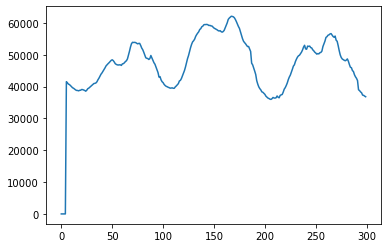

In [17]:
# plot 2 days of the electricity load series, 96 dp is collected every day
de_data["DE_load_actual_entsoe_transparency"][0:300].plot()

In [18]:
# to
# 1) trim the begging 100 dp of the data
# 2) discard the date column
# 3) normalize all data values within each column. (x-x_mean)/x_std
# add an standard datetime as the index
tmp_de_data = de_data.iloc[100:,1:]

data_values = tmp_de_data.values
mean_x = np.mean(data_values,axis=0)
std_x = np.std(data_values,axis=0)
normalized_x = (data_values - mean_x)/std_x
new_de_data = pd.DataFrame(data = normalized_x, columns=tmp_de_data.columns)

new_de_data = new_de_data.set_index(pd.to_datetime(de_data[100:]["utc_timestamp"]))
# original_y = data_values[:,0] # to keep y at original scale


In [19]:
# to create a predication dataset
# predict in a auto-regressive manner
# 1) keep the last 5 nearest neighbor dp
# 2) keep the dp at the same time stamp for previous 7 days
# 3) keep the dp at the same time stamp for previous year
start = 4*24*365 + 1
X, y = [], []
for i in range(start, len(new_de_data),3):
    tmp_y = new_de_data.iloc[i,0]
    neighbor5 = new_de_data[(i-5):i]
    all_date = []
    one_year_date = new_de_data.iloc[i].name - pd.offsets.DateOffset(years=1)
    all_date.append(one_year_date)
    for day in range(1,8):
        all_date.append(new_de_data.iloc[i].name - pd.offsets.DateOffset(days=day))
    year_day_data  = new_de_data.loc[all_date]

    tmp_x = np.concatenate([year_day_data.values, neighbor5.values], axis=0)

    X.append(tmp_x)
    y.append(tmp_y)

In [20]:
X[-1][0]

array([-1.04864174, -1.21123245,  0.90048689, -0.65481614, -0.59083605,
        1.0156788 ,  0.30120878,  0.19737225,  1.69095772, -0.44186846,
       -0.65155856,  0.92003859,  0.42907316,  0.34197075, -0.57944369,
       -0.52160537, -0.63621753,  0.84736012,  2.69028937,  0.65037283,
        0.96176288,  0.96209914, -0.34039461,  1.01110118,  0.17559522,
        1.16711534, -1.37167258, -1.10376055, -0.64962003,  0.84501751,
       -0.91058619, -1.60719787, -0.64939169, -0.43382362, -1.02718771,
       -0.13797344, -0.95437409, -1.10061448, -0.64236336,  0.95965144])

In [21]:
y

[-1.8144058232148526,
 -1.878688394094613,
 -1.9132247898859505,
 -1.923098022328504,
 -1.8664588909279243,
 -1.7960695355678584,
 -1.7450611542409311,
 -1.6679734569998272,
 -1.4389301993610877,
 -1.1394617343986013,
 -0.8891283856607182,
 -0.5889916799307369,
 -0.4134375603280628,
 -0.2878262220206903,
 -0.1552217590197929,
 -0.1429763216470225,
 -0.23495652624599953,
 -0.27018506411395293,
 -0.30818017851261165,
 -0.2725652361472094,
 -0.1476211427194531,
 0.127336529739893,
 0.26502400448043145,
 0.24065960749565482,
 0.12369456776264685,
 -0.08212458451394275,
 -0.37650505829738834,
 -0.5024868668961298,
 -0.5148647573569427,
 -0.7129817127694303,
 -0.956577879998954,
 -1.2078244579228194,
 -1.3841165304445906,
 -1.486169145062126,
 -1.5490046908522124,
 -1.562978989584703,
 -1.5794649175506132,
 -1.580211833460631,
 -1.6694364162955821,
 -1.6731281726668294,
 -1.576712283450228,
 -1.3575562006843624,
 -1.1777775246946285,
 -0.9045397506040829,
 -0.6840920012578264,
 -0.4813003481

In [22]:
# to save the result
X_result = np.stack(X)
y_result = np.array(y)
np.savez('electricity.npz', X=X_result, y=y_result, mean_y=mean_x[0], std_y = std_x[0])

In [23]:
import numpy as np
data = np.load('electricity.npz')
X1, y1 = data["X"],  data["y"]